In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import collections as co

In [31]:
data = pd.read_csv(r"C:\Users\Surface\Desktop\大四下\複雜系統\Coding\Final report\WHO-COVID-19-global-data.csv")

In [32]:
set_Country = set(data["Country"])
list_Country = list(set_Country)
list_data = data.values.tolist() #整個轉為list
print(list_Country)

['Saint Kitts and Nevis', 'Benin', 'Germany', 'Iran (Islamic Republic of)', 'Bahrain', 'New Caledonia', 'Yemen', 'Guinea-Bissau', 'Azerbaijan', 'Latvia', 'Sint Eustatius', 'Tonga', 'Guam', 'France', 'Sweden', 'Palau', 'Colombia', 'Libya', 'Sri Lanka', 'United Republic of Tanzania', 'Iceland', 'Other', 'Qatar', 'Syrian Arab Republic', 'Hungary', 'Indonesia', 'Pitcairn Islands', 'Montenegro', 'Tokelau', 'Nepal', 'Gibraltar', 'Tuvalu', 'French Guiana', 'Jordan', 'Kuwait', 'Bhutan', 'Democratic Republic of the Congo', 'Botswana', 'Micronesia (Federated States of)', 'Republic of Korea', 'Sao Tome and Principe', 'Greece', 'Guatemala', 'Faroe Islands', 'Samoa', 'Algeria', 'Czechia', 'Marshall Islands', 'Angola', 'Georgia', 'Kosovo[1]', "Lao People's Democratic Republic", 'Cook Islands', 'Morocco', 'Cameroon', 'Ecuador', 'Saba', 'Malawi', 'Rwanda', 'Gambia', 'Italy', 'Central African Republic', 'Senegal', 'Saint Martin', 'Bonaire', 'Nigeria', 'Cambodia', 'Eritrea', 'Fiji', 'Saint Barthélemy', 

In [33]:
for i in list_Country:
    locals()[str(i) + "_data"] = []
    for j in range(0, len(list_data)):
        if(list_data[j][1] == i):
            locals()[str(i) + "_data"].append([[list_data[j][0]], list_data[j][2:6]])
        
        else:
            pass

In [34]:
print(locals()[str("Afghanistan") + "_data"])
print(locals()[str("Afghanistan") + "_data"][0])
print(locals()[str("Afghanistan") + "_data"][0][0])
print(locals()[str("Afghanistan") + "_data"][0][1])

[[['2020/1/3'], [0, 0, 0, 0]], [['2020/1/4'], [0, 0, 0, 0]], [['2020/1/5'], [0, 0, 0, 0]], [['2020/1/6'], [0, 0, 0, 0]], [['2020/1/7'], [0, 0, 0, 0]], [['2020/1/8'], [0, 0, 0, 0]], [['2020/1/9'], [0, 0, 0, 0]], [['2020/1/10'], [0, 0, 0, 0]], [['2020/1/11'], [0, 0, 0, 0]], [['2020/1/12'], [0, 0, 0, 0]], [['2020/1/13'], [0, 0, 0, 0]], [['2020/1/14'], [0, 0, 0, 0]], [['2020/1/15'], [0, 0, 0, 0]], [['2020/1/16'], [0, 0, 0, 0]], [['2020/1/17'], [0, 0, 0, 0]], [['2020/1/18'], [0, 0, 0, 0]], [['2020/1/19'], [0, 0, 0, 0]], [['2020/1/20'], [0, 0, 0, 0]], [['2020/1/21'], [0, 0, 0, 0]], [['2020/1/22'], [0, 0, 0, 0]], [['2020/1/23'], [0, 0, 0, 0]], [['2020/1/24'], [0, 0, 0, 0]], [['2020/1/25'], [0, 0, 0, 0]], [['2020/1/26'], [0, 0, 0, 0]], [['2020/1/27'], [0, 0, 0, 0]], [['2020/1/28'], [0, 0, 0, 0]], [['2020/1/29'], [0, 0, 0, 0]], [['2020/1/30'], [0, 0, 0, 0]], [['2020/1/31'], [0, 0, 0, 0]], [['2020/2/1'], [0, 0, 0, 0]], [['2020/2/2'], [0, 0, 0, 0]], [['2020/2/3'], [0, 0, 0, 0]], [['2020/2/4'], [0

In [35]:
for j in list_Country:

    locals()[str("{}".format(j)) + "_time"] = []
    locals()[str("{}".format(j)) + "_New_cases"] = []
    locals()[str("{}".format(j)) + "_Cumulative_cases"] = []
    locals()[str("{}".format(j)) + "_New_deaths"] = []
    locals()[str("{}".format(j)) + "_Cumulative_deaths"] = []

    for i in range( 0, len(locals()[str("{}".format(j)) + "_data"]) ):
        locals()[str("{}".format(j)) + "_time"].append(locals()[str("{}".format(j)) + "_data"][i][0][0])
        locals()[str("{}".format(j)) + "_New_cases"].append(locals()[str("{}".format(j)) + "_data"][i][1][0])
        locals()[str("{}".format(j)) + "_Cumulative_cases"].append(locals()[str("{}".format(j)) + "_data"][i][1][1])
        locals()[str("{}".format(j)) + "_New_deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][2])
        locals()[str("{}".format(j)) + "_Cumulative_deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][3])

## 全球累計確診人口

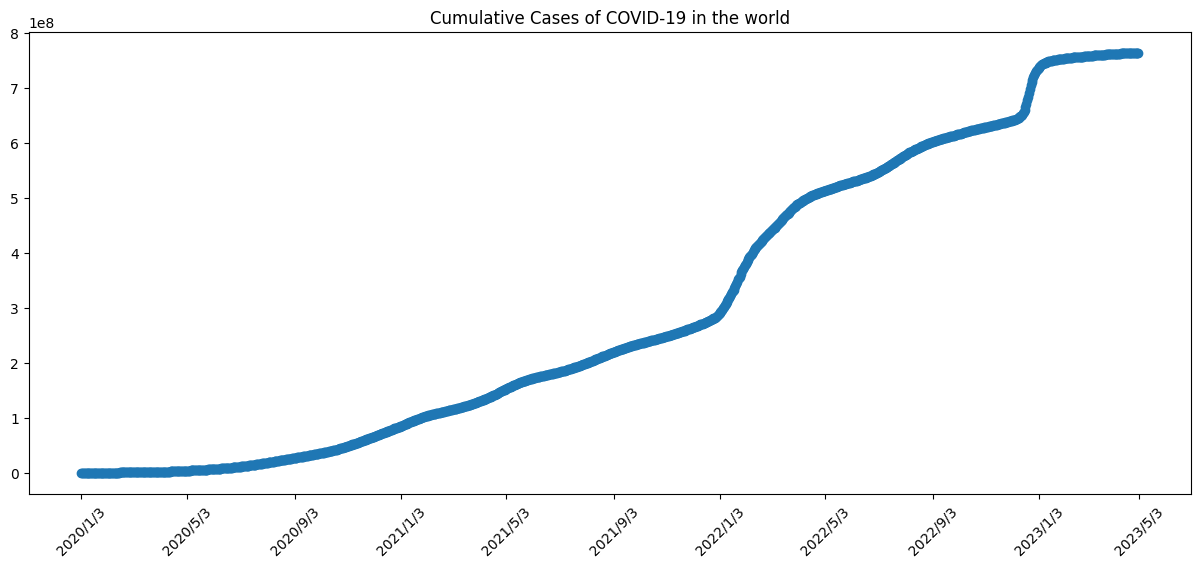

In [17]:
total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_Cumulative_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]


rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]

plt.figure(figsize = (15, 6))
plt.title("Cumulative Cases of COVID-19 in the world")
plt.scatter(time, total_cases)
plt.xticks(rang, rotation = 45)
plt.show()

## 全球的新增人口

[8, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

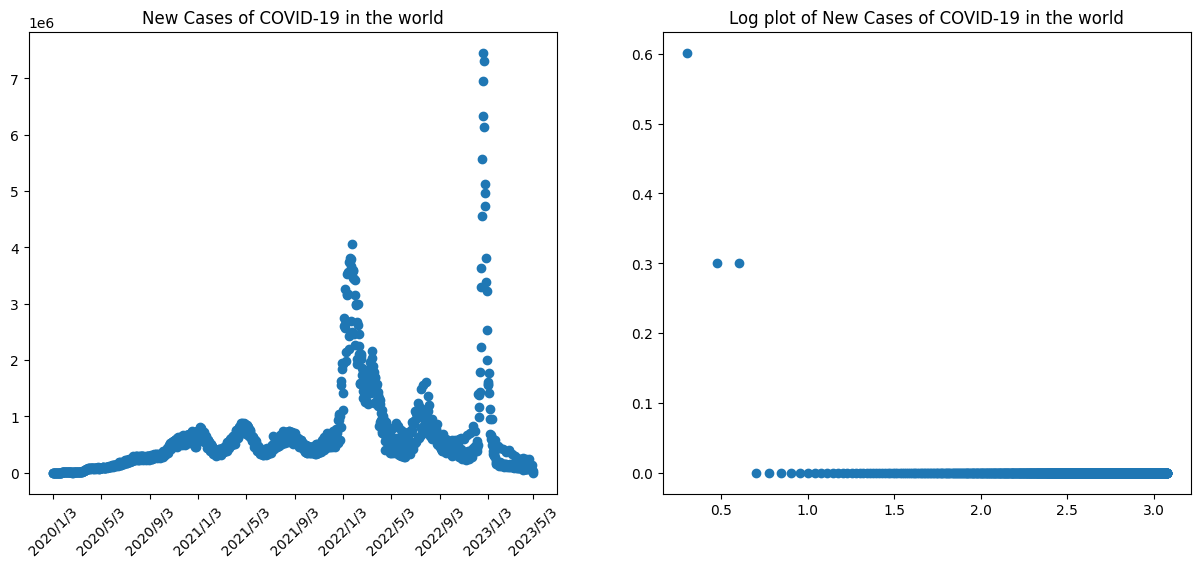

In [46]:
total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_New_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]

count = []
cate = list(set(total_cases))
for i in range(0, len(cate)):
    count.append(co.Counter(total_cases)[cate[i]])
count = sorted(count, reverse = True) #由大到小排列

x = np.linspace(1, len(count), len(count))
print(count)

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

log_count.remove(log_count[0])
log_x.remove(log_x[0])

rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]

print(log_count)

plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.title("New Cases of COVID-19 in the world")
plt.scatter(time, total_cases)
plt.xticks(rang, rotation = 45)

plt.subplot(122)
plt.title("Log plot of New Cases of COVID-19 in the world")
plt.scatter(log_x, log_count)
plt.show()

### 新增人口比率

[-0.57413008  1.53633687]
[0.00893037 0.02105656]


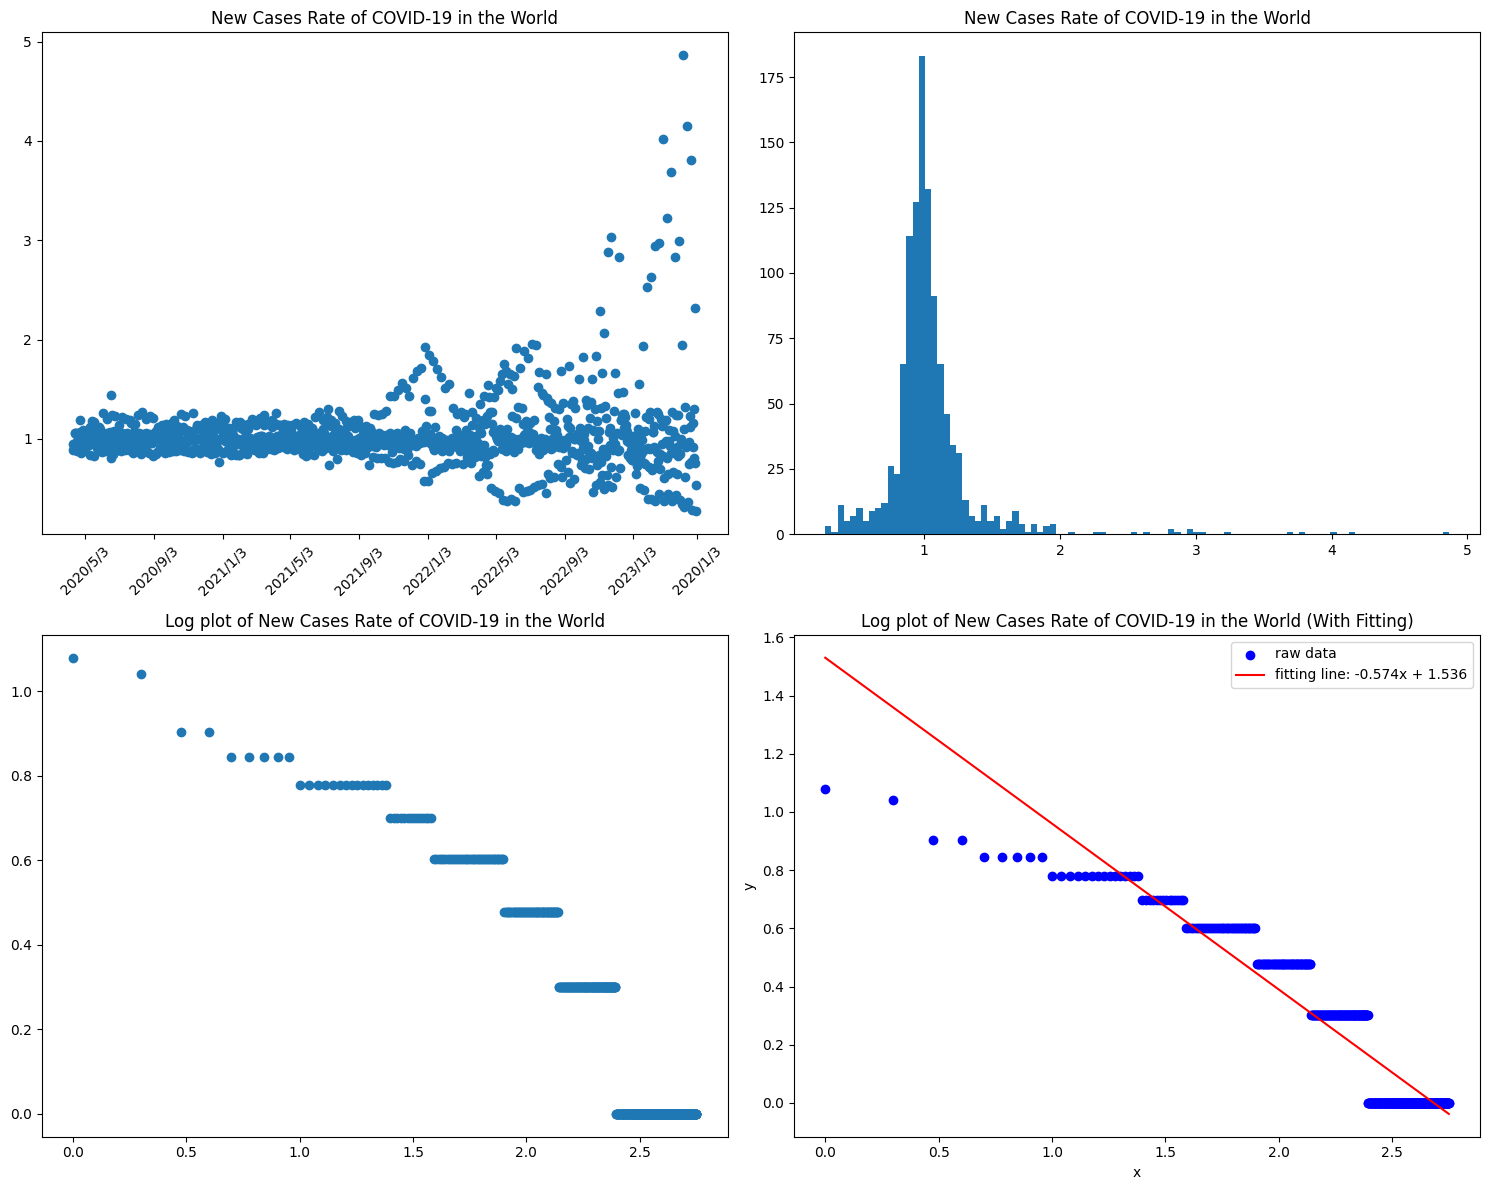

In [43]:
total_cases = []

# 1210 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 1210):
    
    sum = 0
    for j in list_Country:
        sum = sum + locals()[str("{}".format(j)) + "_New_cases"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("Afghanistan"))) + "_time"]

total_cases_rate = []
start = 100
for i in range(start, 1210-1):
    total_cases_rate.append( round(total_cases[i]/total_cases[i-1], 3) )


# count = pd.value_counts(total_cases_rate)
# count = list(count)

count = []
cate = list(set(total_cases_rate))
for i in range(0, len(cate)):
    count.append(co.Counter(total_cases_rate)[cate[i]])
count = sorted(count, reverse = True) #由大到小排列
x = np.linspace(1, len(count), len(count))

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

# log_count.remove(log_count[0])
# log_x.remove(log_x[0])


rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3"]

plt.figure(figsize = (15, 12))
plt.subplot(221)
plt.title("New Cases Rate of COVID-19 in the World")
plt.scatter(time[ start:(1210-1) ], total_cases_rate)
plt.xticks(rang, rotation = 45)

plt.subplot(223)
plt.title("Log plot of New Cases Rate of COVID-19 in the World")
plt.scatter(log_x, log_count)
##########################################################################
# FITTING

x0 = log_x
y0 = log_count

def function(x,a,b):
    return a*x + b
fitt=(-0.5, 2.5) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
print(popt)
popt = np.round(popt, 3)
#print(pcov)
print(perr)
plt.subplot(224)
plt.title("Log plot of New Cases Rate of COVID-19 in the World (With Fitting)")
plt.scatter(x0, y0, color="blue", label="raw data")
plt.plot(x0, 
        function(np.array(x0), -0.57, 1.53),
        color="red", 
        label="fitting line: {}x + {}".format(*popt))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'upper right')

######################################################################

plt.subplot(222)
plt.hist(total_cases_rate, bins = 100)
plt.title("New Cases Rate of COVID-19 in the World")
# plt.xlim(0, 2)

plt.tight_layout()
plt.show()

## 單獨國家時間的新增人口

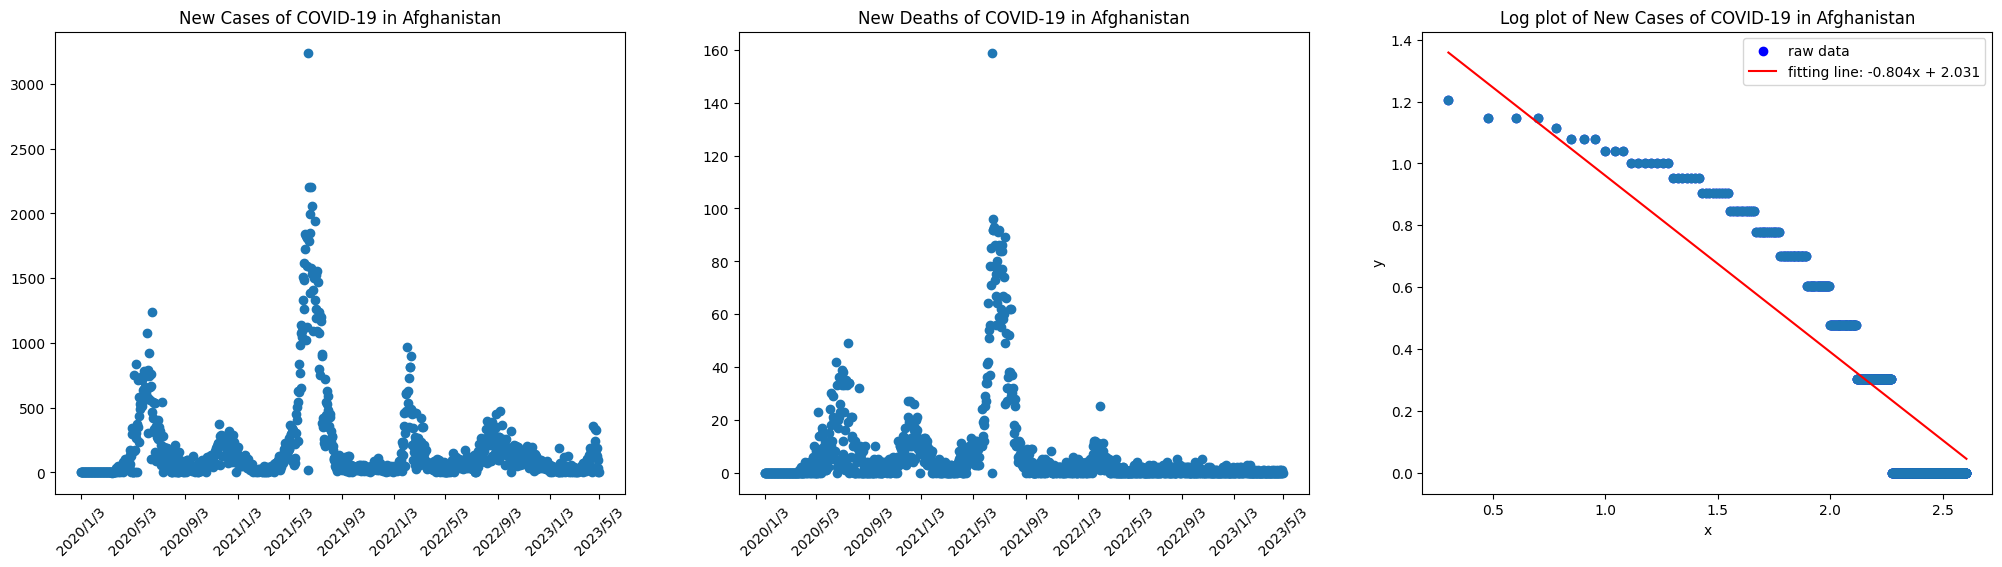

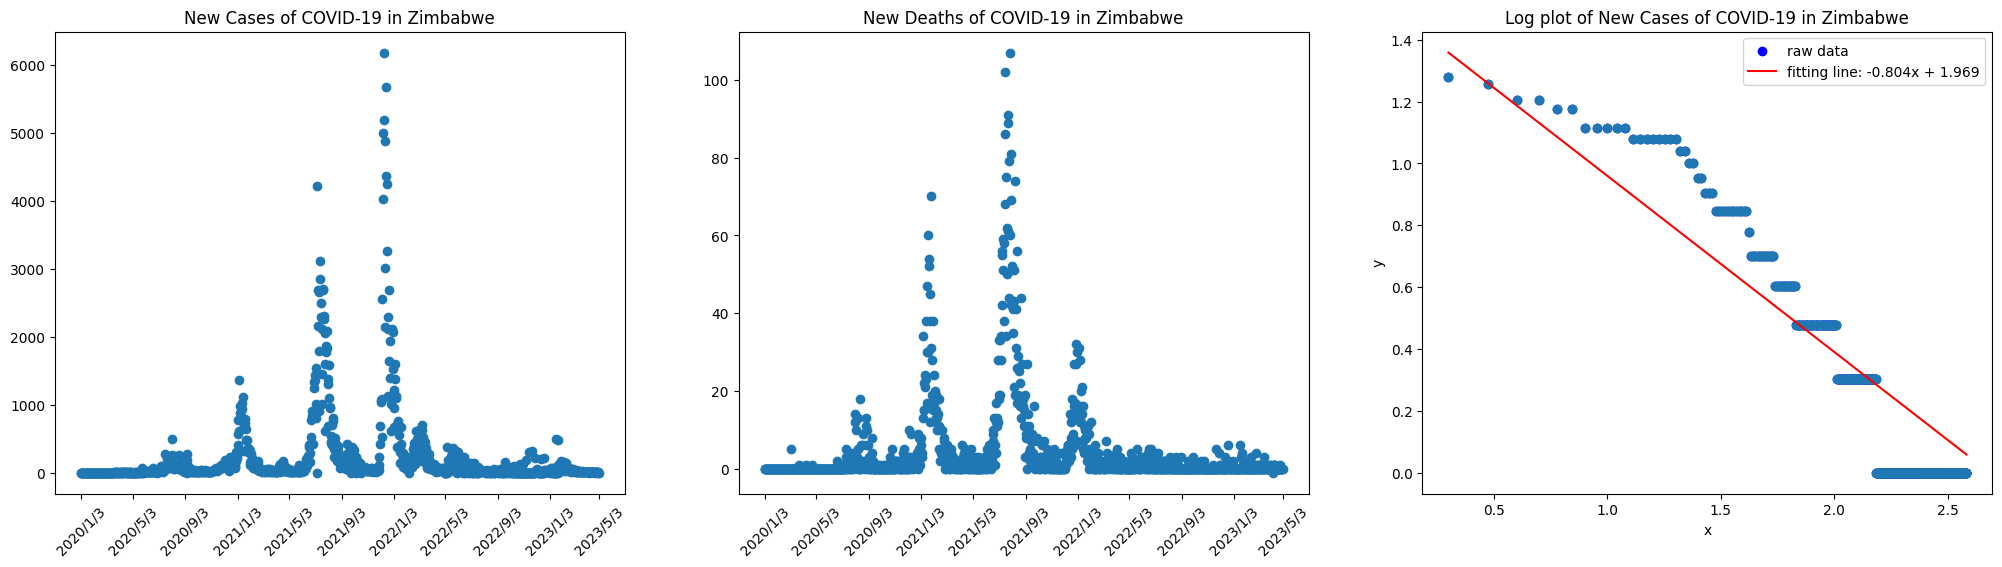

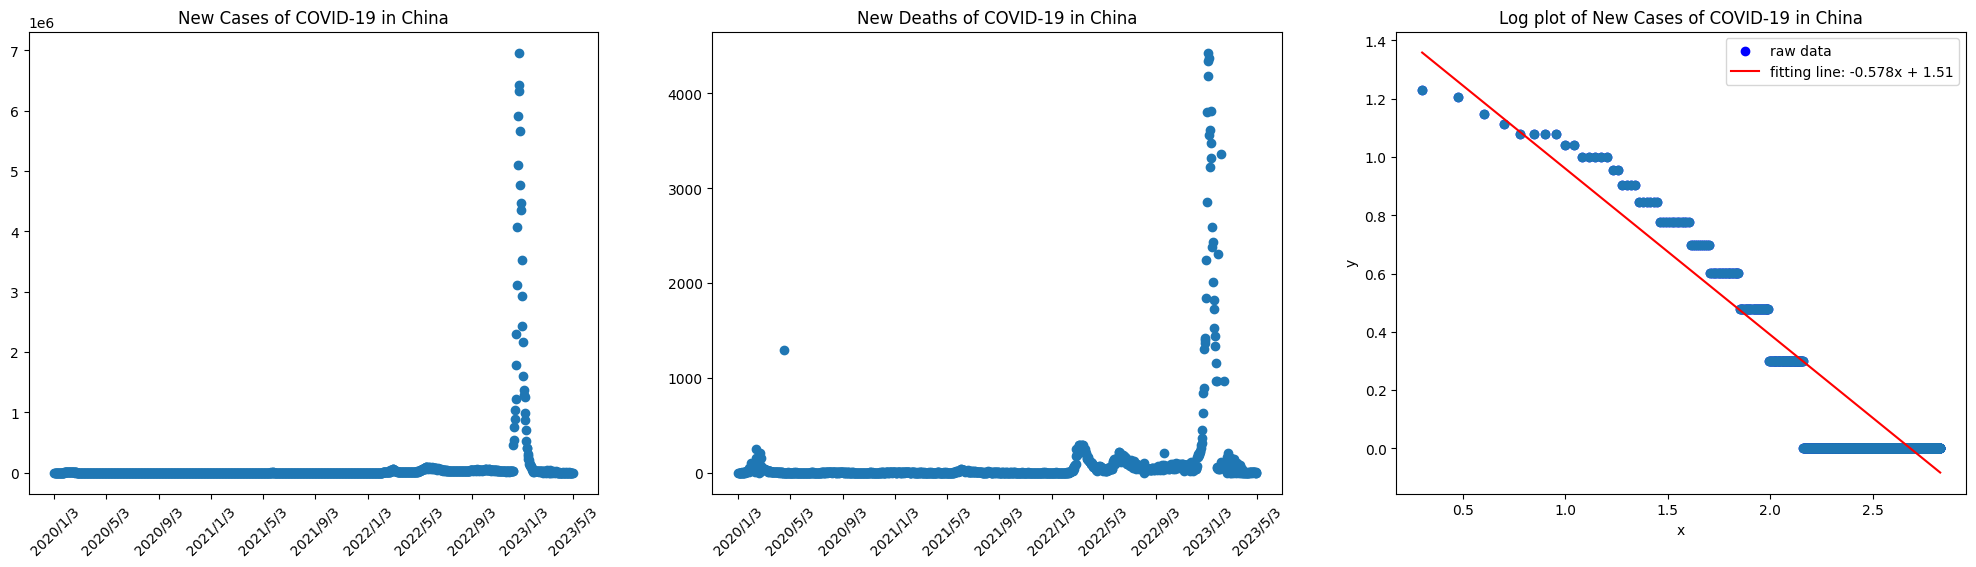

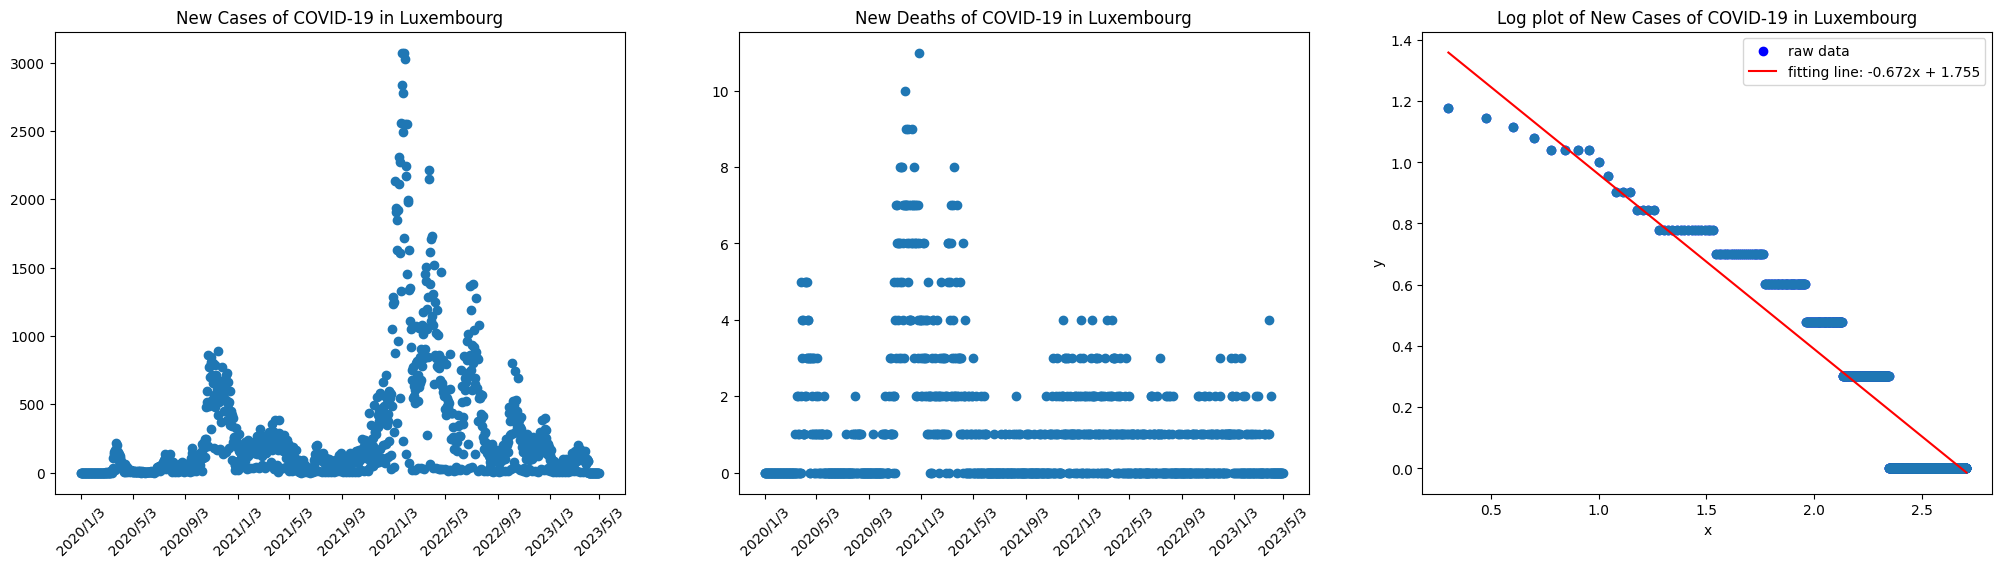

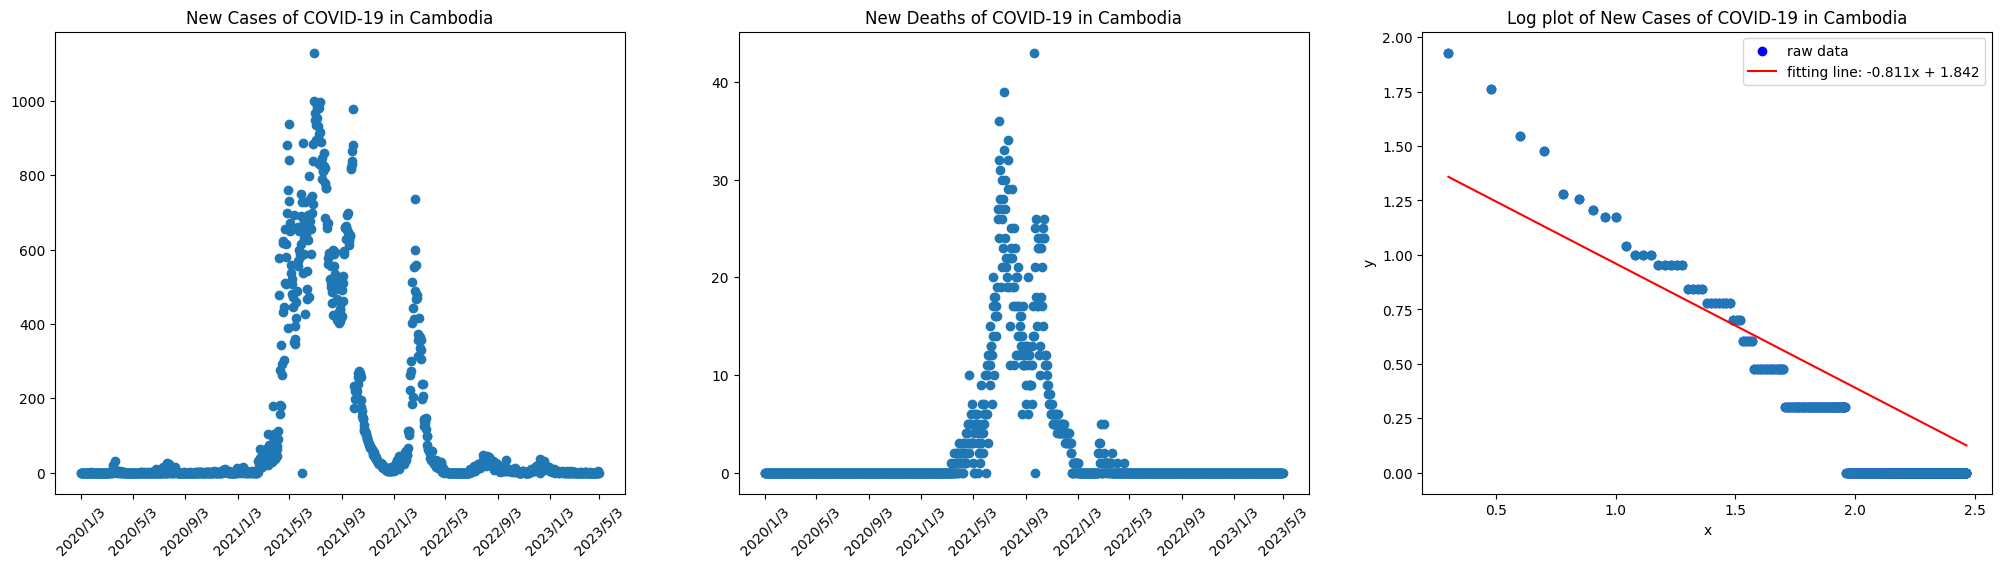

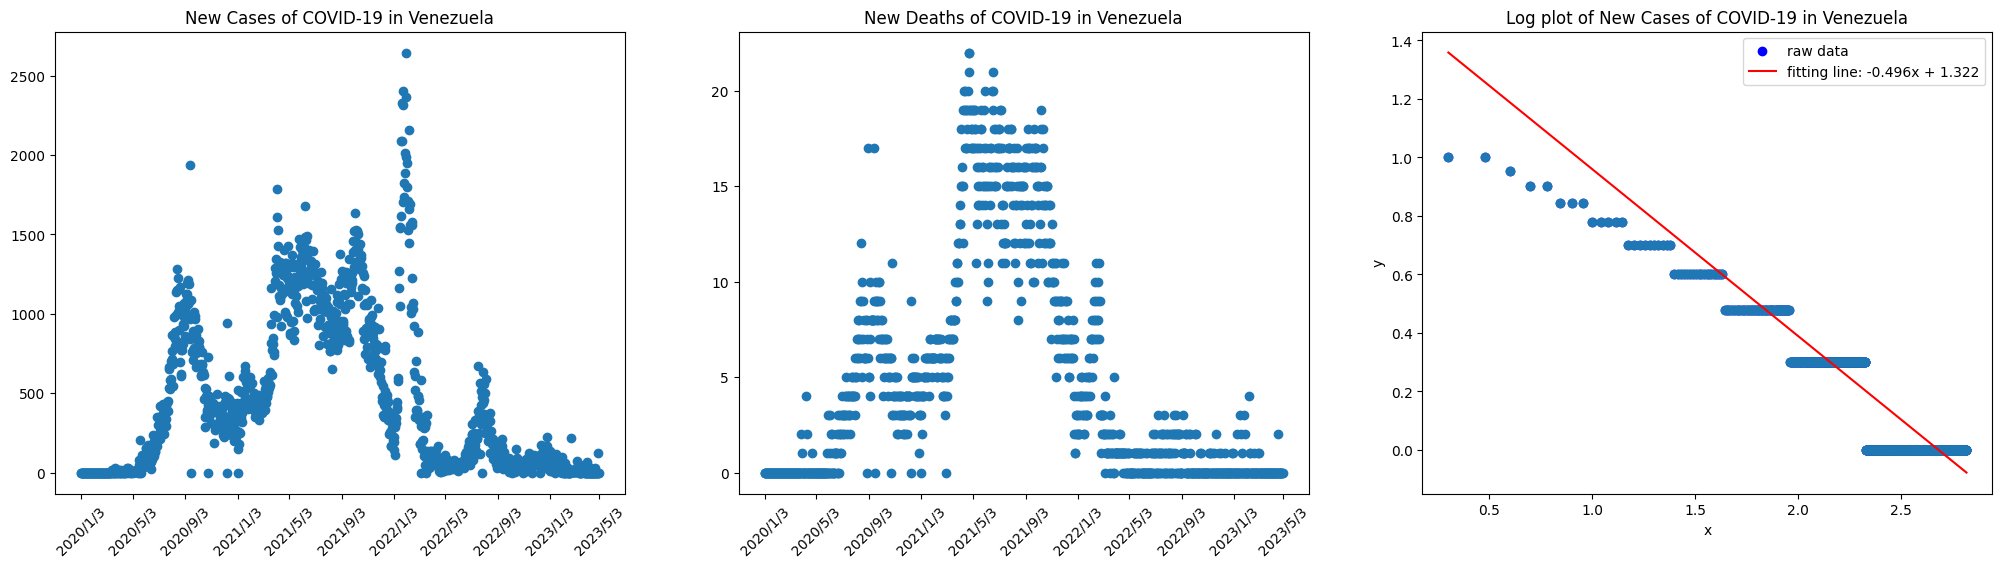

In [11]:
group1 = ["Afghanistan", "Zimbabwe", "China", "Luxembourg", "Cambodia", "Venezuela"]

for i in group1:
    civ = i
    time = locals()[str("{}".format("{}".format(civ))) + "_time"]
    New_cases = locals()[str("{}".format("{}".format(civ))) + "_New_cases"]
    Cumulative_cases = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_cases"]
    New_deaths = locals()[str("{}".format("{}".format(civ))) + "_New_deaths"]
    Cumulative_deaths = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_deaths"]



    count = pd.value_counts(New_cases)
    count = list(count)
    x = np.linspace(1, len(count), len(count))

    log_count = []
    log_x = []
    for j in range(len(count)):
        log_count.append(np.log10(count[j]))
        log_x.append(np.log10(x[j]))

    log_count.remove(log_count[0])
    log_x.remove(log_x[0])

    rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]
    
    plt.figure(figsize = (25, 6))
    plt.subplot(131)
    plt.title("New Cases of COVID-19 in {}".format(civ))
    plt.scatter(time, New_cases)
    plt.xticks(rang, rotation = 45)
    plt.subplot(132)
    plt.title("New Deaths of COVID-19 in {}".format(civ))
    plt.scatter(time, New_deaths)
    plt.xticks(rang, rotation = 45)
    plt.subplot(133)

    ##########################################################################
    # FITTING

    x0 = log_x
    y0 = log_count

    def function(x,a,b):
        return a*x + b
    fitt=(-0.7, 2.5) # 猜 x = 1, y = 2*pi
    popt,pcov= curve_fit(function, x0, y0, p0=fitt)
    perr=np.sqrt(np.diag(pcov))
    popt = np.round(popt, 3)

    plt.title("Log plot of New Cases Rate of COVID-19 in the World (With Fitting)")
    plt.scatter(x0, y0, color="blue", label="raw data")
    plt.plot(x0, 
            function(np.array(x0), -0.57, 1.53),
            color="red", 
            label="fitting line: {}x + {}".format(*popt))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 'upper right')

    ######################################################################
    plt.title("Log plot of New Cases of COVID-19 in {}".format(civ))
    plt.scatter(log_x, log_count)

plt.show()

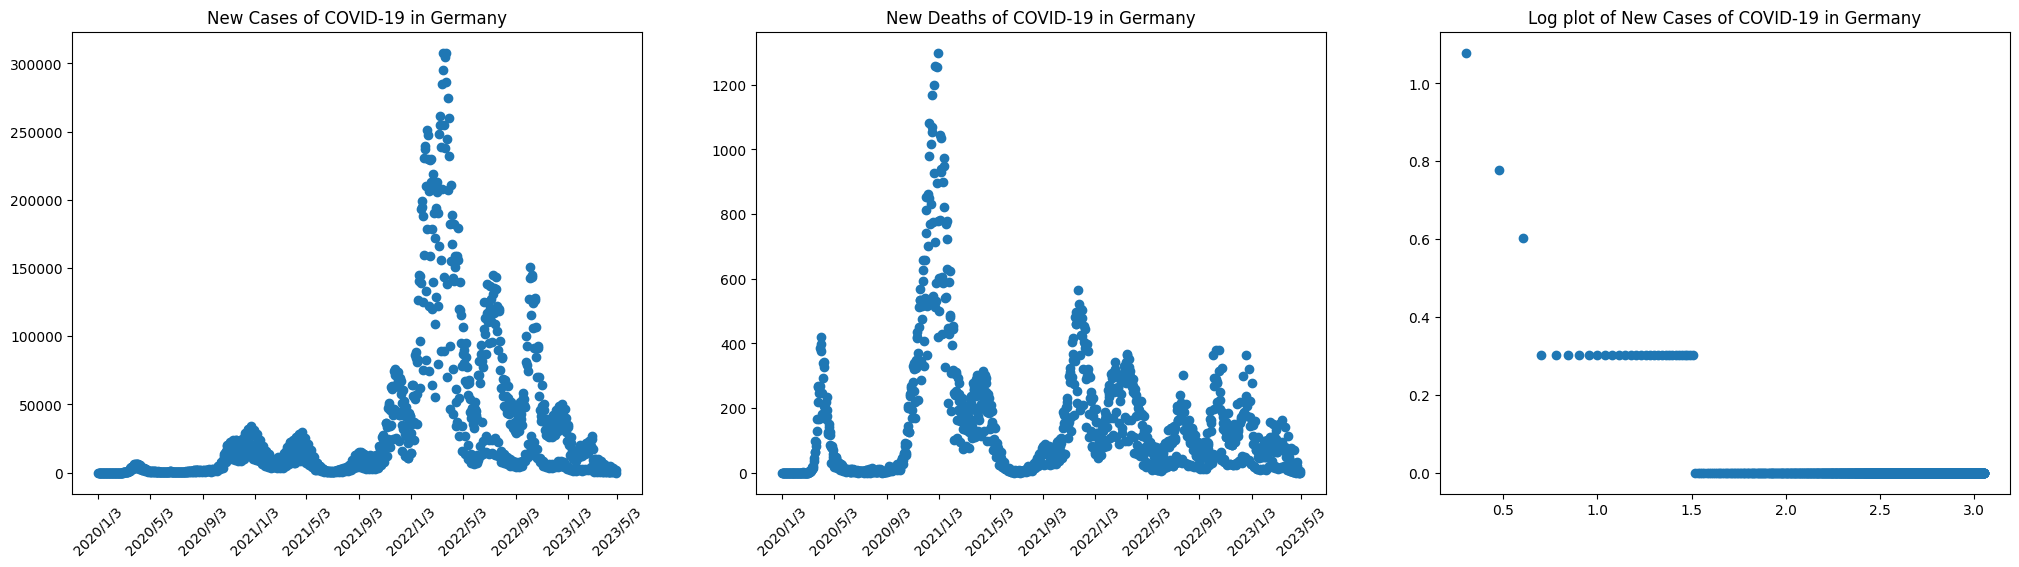

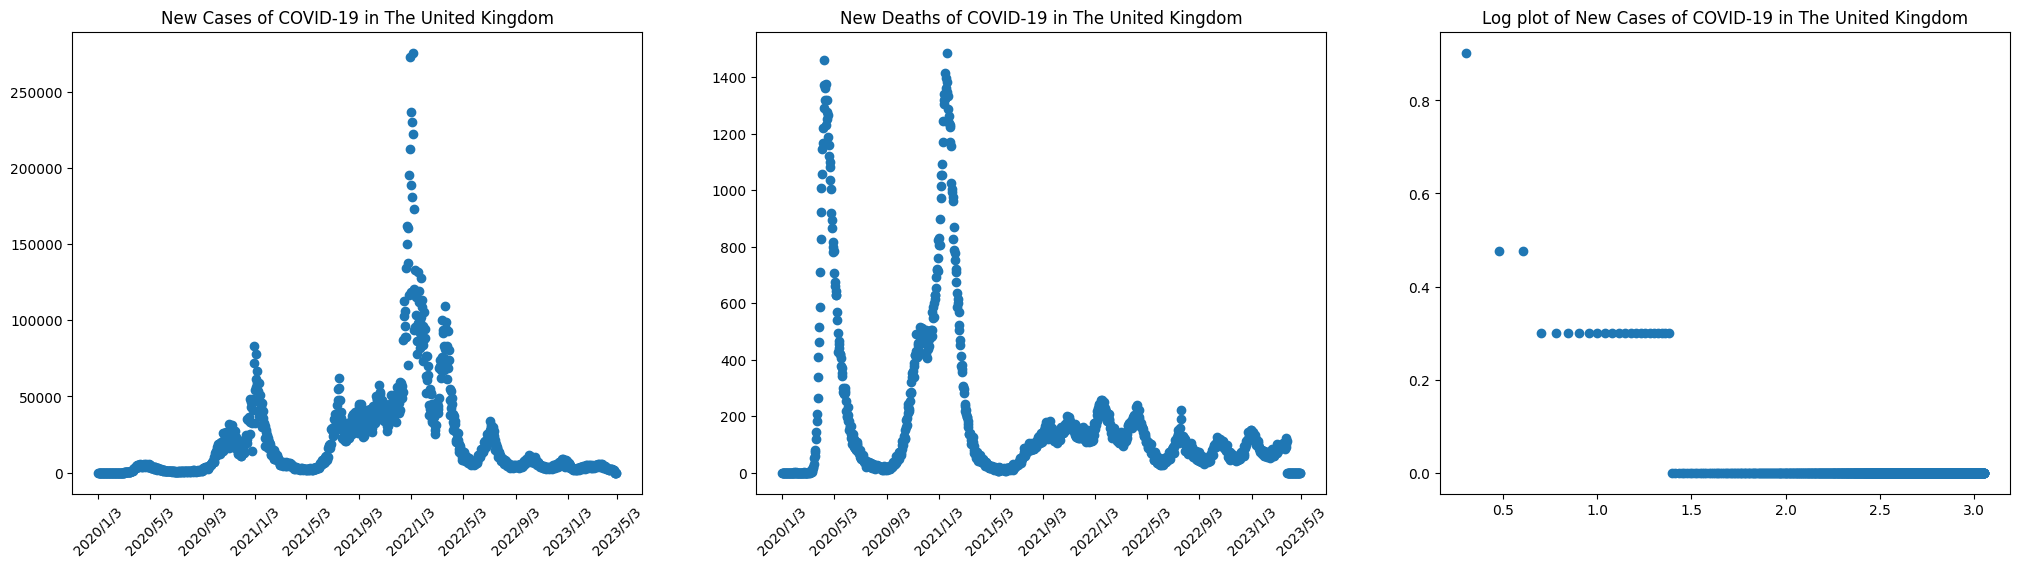

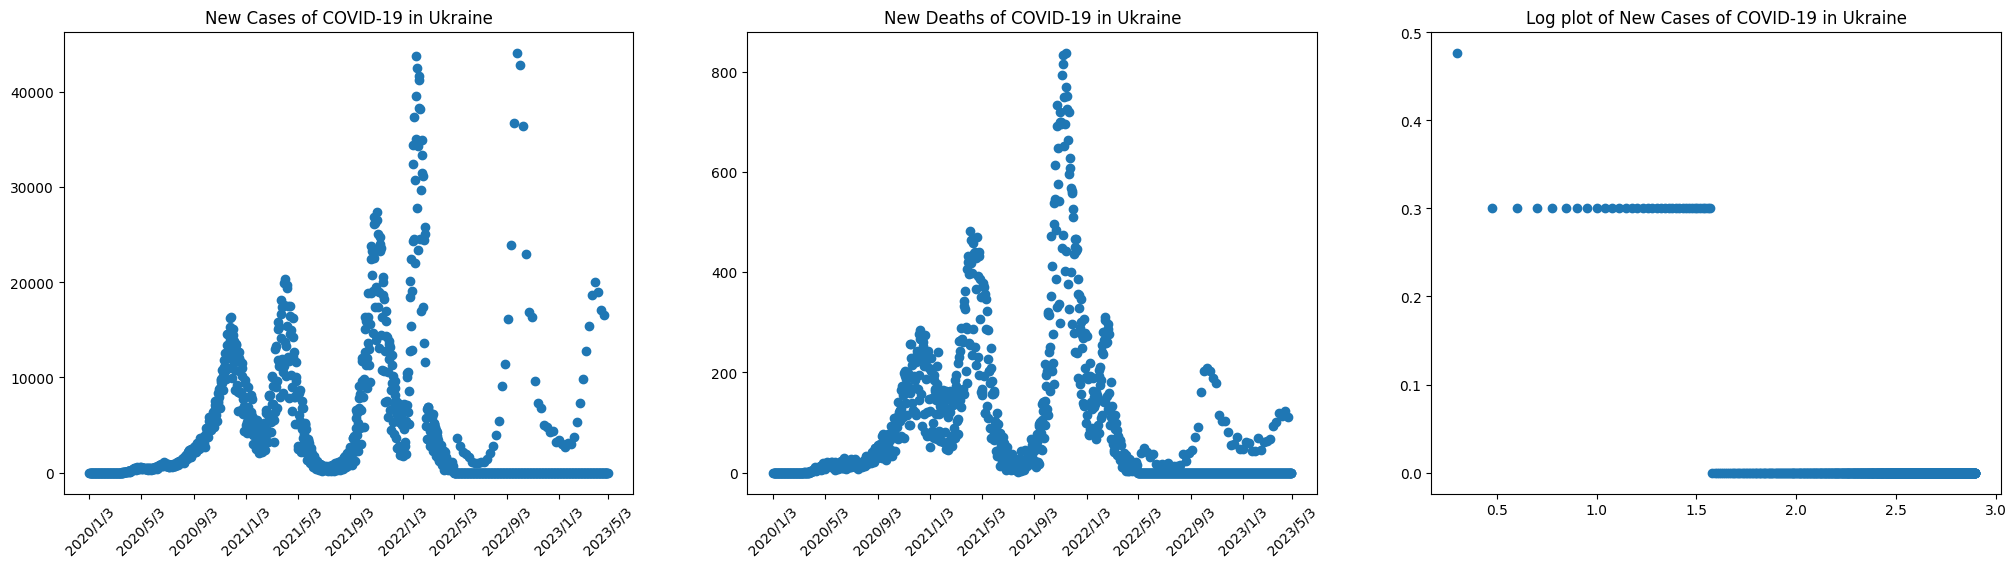

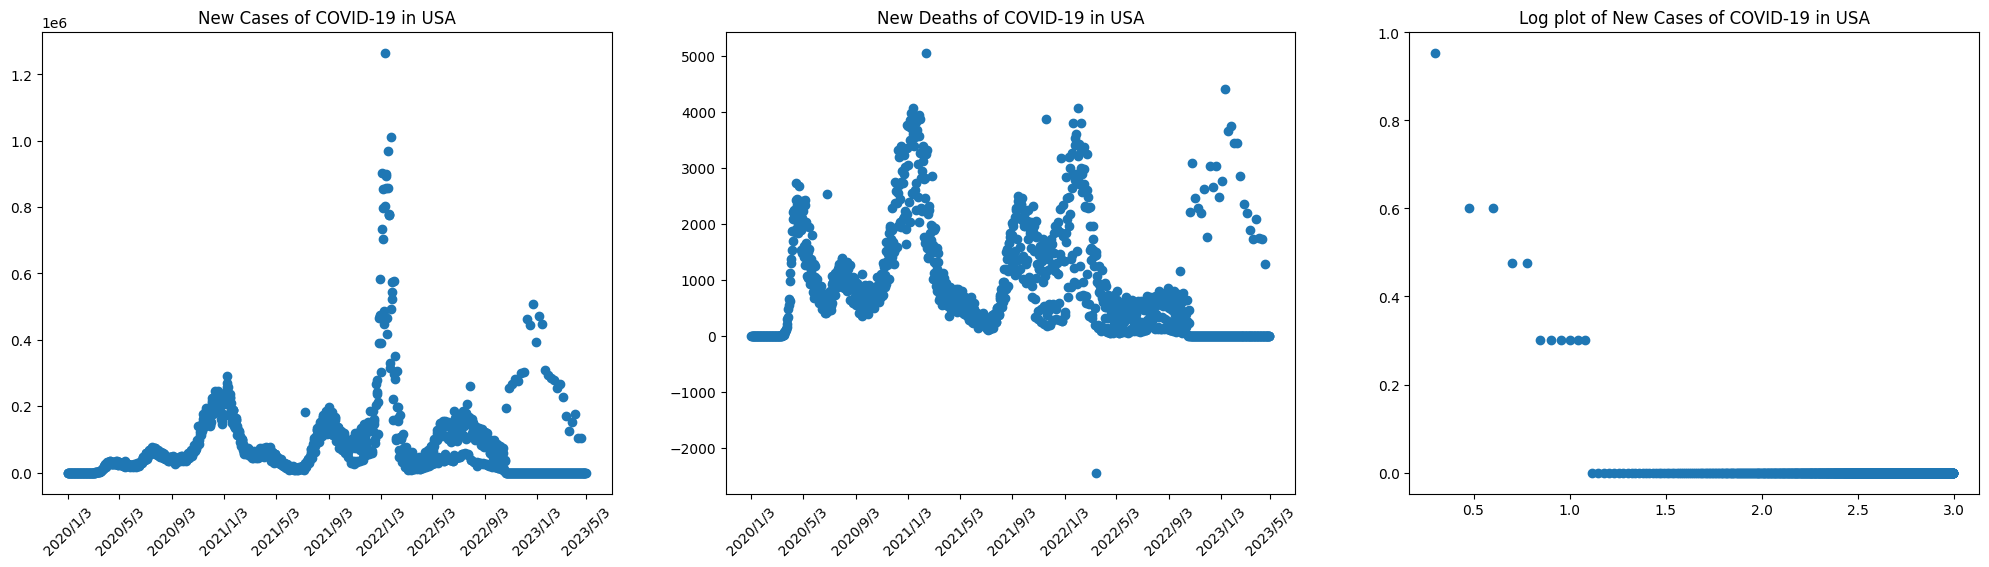

In [12]:
group2 = ["Germany", "The United Kingdom", "Ukraine", "USA"]

for i in group2:
    civ = i
    time = locals()[str("{}".format("{}".format(civ))) + "_time"]
    New_cases = locals()[str("{}".format("{}".format(civ))) + "_New_cases"]
    Cumulative_cases = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_cases"]
    New_deaths = locals()[str("{}".format("{}".format(civ))) + "_New_deaths"]
    Cumulative_deaths = locals()[str("{}".format("{}".format(civ))) + "_Cumulative_deaths"]



    count = pd.value_counts(New_cases)
    count = list(count)
    x = np.linspace(1, len(count), len(count))

    log_count = []
    log_x = []
    for j in range(len(count)):
        log_count.append(np.log10(count[j]))
        log_x.append(np.log10(x[j]))

    log_count.remove(log_count[0])
    log_x.remove(log_x[0])

    rang = ["2020/1/3", "2020/5/3", "2020/9/3",
            "2021/1/3", "2021/5/3", "2021/9/3",
            "2022/1/3", "2022/5/3", "2022/9/3",
            "2023/1/3", "2023/5/3"]
    plt.figure(figsize = (25, 6))
    plt.subplot(131)
    plt.title("New Cases of COVID-19 in {}".format(civ))
    plt.scatter(time, New_cases)
    plt.xticks(rang, rotation = 45)
    plt.subplot(132)
    plt.title("New Deaths of COVID-19 in {}".format(civ))
    plt.scatter(time, New_deaths)
    plt.xticks(rang, rotation = 45)
    plt.subplot(133)
    plt.title("Log plot of New Cases of COVID-19 in {}".format(civ))
    plt.scatter(log_x, log_count)

plt.show()